# Trees in R: 
### Michael Poli 20184659

In [9]:
data <- read.csv('L:/kse521_team_assignments/HW1/Churn.csv')

In [2]:
head(data,20)

COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY
zero,133728,64,48,632969,626,3,2,unsat,high,no,STAY
zero,42052,224,0,697949,191,10,5,very_unsat,little,actively_looking_into_it,STAY
one,84744,0,20,688098,357,0,5,very_unsat,little,considering,STAY
zero,38171,0,7,274218,190,0,5,very_sat,little,actively_looking_into_it,STAY
zero,105824,174,18,153560,687,25,4,very_sat,little,never_thought,LEAVE


## A first look at the data:

As a first glance, it looks like CONSIDERING_CHANGE_OF_PLAN might have a positive correlation with LEAVE, especially when combined with REPORTED_SATISFACTION. That is, high ordinal values of that particular predictive value indicate a high probability of churning. High HANDSET_PRICE values might also suggest a higher likelihood of the customer leaving. 

Another observation is that there are many discrepancies between reported data from the customer and data collected directly. That is very apparent in some data entries where the user reports very low usage level but the number of monthly calls over 15 minutes is rather high compared to the average.

In [12]:
data %>%
      summarise_all(funs(list(levels(.))))

COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
"one , zero",NULL,NULL,NULL,NULL,NULL,NULL,NULL,"avg , sat , unsat , very_sat , very_unsat","avg , high , little , very_high , very_little","actively_looking_into_it, considering , never_thought , no , perhaps","LEAVE, STAY"


In this way we are able to gather important information on our predictive variables. There are categorical, ordinal and numerical variables. Since the ordinal values might be out of order after one-hot encoding, a reshuffling of the indexes will be necessary

In [13]:
library(dummies)

dummies-1.5.6 provided by Decision Patterns



### Some simple feature engineering
Converting categorical variables into one-hot vectors

In [14]:
hot_encoded_df <- dummy.data.frame(data, names=c("COLLEGE","REPORTED_SATISFACTION","REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN","LEAVE"), sep="_")

In [15]:
colnames(hot_encoded_df)

[1] "COLLEGE_one"                                        
 [2] "COLLEGE_zero"                                       
 [3] "INCOME"                                             
 [4] "OVERAGE"                                            
 [5] "LEFTOVER"                                           
 [6] "HOUSE"                                              
 [7] "HANDSET_PRICE"                                      
 [8] "OVER_15MINS_CALLS_PER_MONTH"                        
 [9] "AVERAGE_CALL_DURATION"                              
[10] "REPORTED_SATISFACTION_avg"                          
[11] "REPORTED_SATISFACTION_sat"                          
[12] "REPORTED_SATISFACTION_unsat"                        
[13] "REPORTED_SATISFACTION_very_sat"                     
[14] "REPORTED_SATISFACTION_very_unsat"                   
[15] "REPORTED_USAGE_LEVEL_avg"                           
[16] "REPORTED_USAGE_LEVEL_high"                          
[17] "REPORTED_USAGE_LEVEL_little"                        
[18] "REPORTED_USAGE_LEVEL_very_high"                     
[19] "REPORTED_USAGE_LEVEL_very_little"                   
[20] "CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it"
[21] "CONSIDERING_CHANGE_OF_PLAN_considering"             
[22] "CONSIDERING_CHANGE_OF_PLAN_never_thought"           
[23] "CONSIDERING_CHANGE_OF_PLAN_no"                      
[24] "CONSIDERING_CHANGE_OF_PLAN_perhaps"                 
[25] "LEAVE_LEAVE"                                        
[26] "LEAVE_STAY"

As we can see some of the ordinal variables are in the wrong order. The easy fix is then swapping the indexes

In [16]:
ord_hot_encoded_df = hot_encoded_df[c(2,1,3:9,14,12,10,11,13,19,17,15,16,18,23,22,24,21,20,25,26)]

In [17]:
colnames(ord_hot_encoded_df)

[1] "COLLEGE_zero"                                       
 [2] "COLLEGE_one"                                        
 [3] "INCOME"                                             
 [4] "OVERAGE"                                            
 [5] "LEFTOVER"                                           
 [6] "HOUSE"                                              
 [7] "HANDSET_PRICE"                                      
 [8] "OVER_15MINS_CALLS_PER_MONTH"                        
 [9] "AVERAGE_CALL_DURATION"                              
[10] "REPORTED_SATISFACTION_very_unsat"                   
[11] "REPORTED_SATISFACTION_unsat"                        
[12] "REPORTED_SATISFACTION_avg"                          
[13] "REPORTED_SATISFACTION_sat"                          
[14] "REPORTED_SATISFACTION_very_sat"                     
[15] "REPORTED_USAGE_LEVEL_very_little"                   
[16] "REPORTED_USAGE_LEVEL_little"                        
[17] "REPORTED_USAGE_LEVEL_avg"                           
[18] "REPORTED_USAGE_LEVEL_high"                          
[19] "REPORTED_USAGE_LEVEL_very_high"                     
[20] "CONSIDERING_CHANGE_OF_PLAN_no"                      
[21] "CONSIDERING_CHANGE_OF_PLAN_never_thought"           
[22] "CONSIDERING_CHANGE_OF_PLAN_perhaps"                 
[23] "CONSIDERING_CHANGE_OF_PLAN_considering"             
[24] "CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it"
[25] "LEAVE_LEAVE"                                        
[26] "LEAVE_STAY"

In [20]:
library(rpart)

In [21]:
length(ord_hot_encoded_df)

[1] 26

In [286]:
#merging the target variable
attach(ord_hot_encoded_df)
ord_hot_df_merged <- data.frame(COLLEGE=COLLEGE_one,ord_hot_encoded_df[3:24],CHURN=LEAVE_LEAVE)
detach(ord_hot_encoded_df)

In [287]:
head(ord_hot_df_merged)

COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_very_unsat,REPORTED_SATISFACTION_unsat,...,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_very_high,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_perhaps,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CHURN
0,31953,0,6,313378,161,0,4,0,1,...,1,0,0,0,1,0,0,0,0,0
1,36147,0,13,800586,244,0,6,0,1,...,1,0,0,0,0,0,0,1,0,0
1,27273,230,0,305049,201,16,15,0,1,...,0,0,0,0,0,0,1,0,0,0
0,120070,38,33,788235,780,3,2,0,1,...,0,0,0,1,0,0,0,1,0,1
1,29215,208,85,224784,241,21,1,1,0,...,1,0,0,0,0,1,0,0,0,0
0,133728,64,48,632969,626,3,2,0,1,...,0,0,1,0,1,0,0,0,0,0


Lookin' good now. Time to grow a tree!

# Time to plant some trees

In [ ]:
install.packages('rattle')

In [83]:
library(rattle)

In [288]:
data.dtree1 <- rpart(CHURN~.,data=ord_hot_df_merged)

In [ ]:
install.packages("RGtk2", depen=T, type="source")

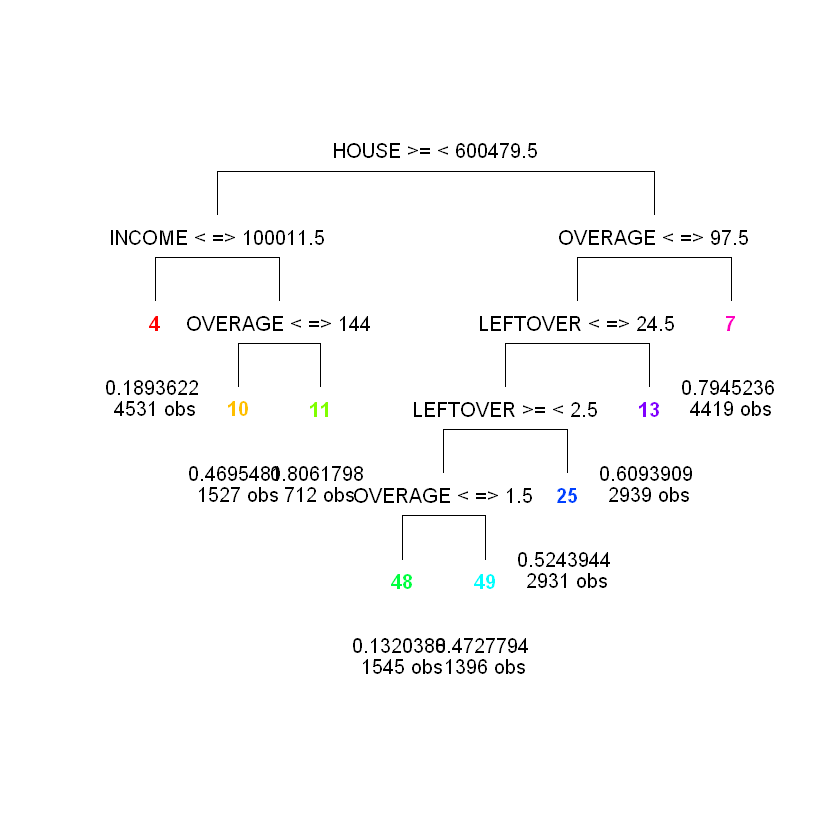

In [187]:
#plotting the result
drawTreeNodes(data.dtree1, size=4, nodeinfo = FALSE)

Interestingly, the model points at HOUSE as the most predictive variable. On the left branch we split customers with a valuable dwelling and then further divide them into low income and high income. The logic seems to hold up but of course without a validation set it is difficult to evaluate how good this model is at predicting and generalizing.

In [192]:
data.dtree_ep <- rpart(CHURN~.,data=ord_hot_df_merged, control=rpart.control(cp=0.0001, minbucket=100, minsplit=300))

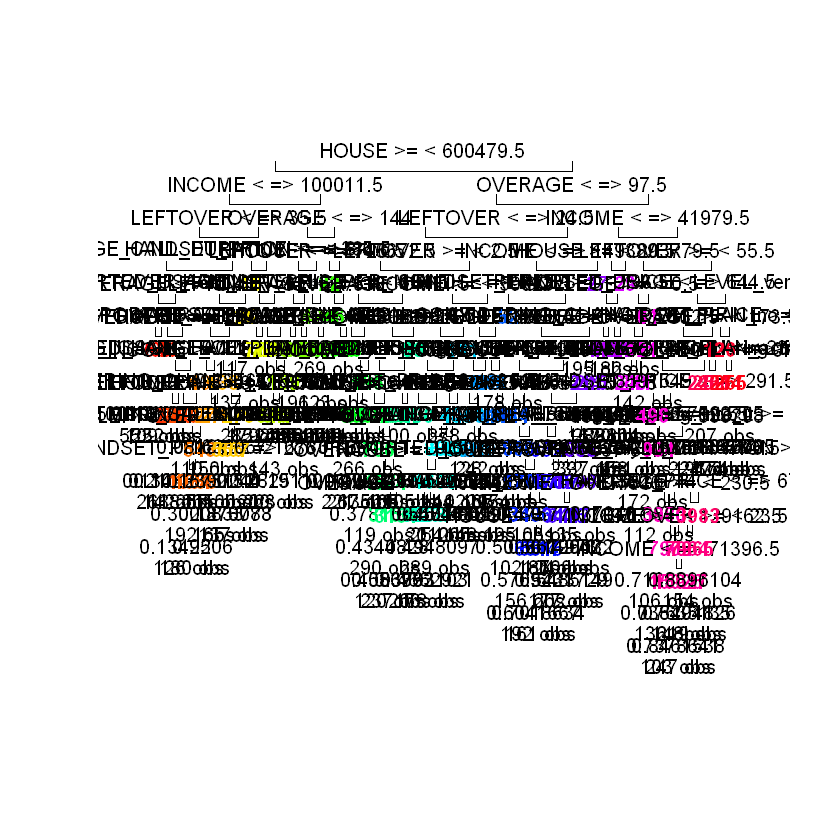

In [193]:
drawTreeNodes(data.dtree_ep, size=4, nodeinfo = FALSE)

Oh no! With cp = 0.0001 and a small minbucket value the tree keeps splitting (the standard value is cp = 0.01). 

In [194]:
data.dtree_ep2 <- rpart(CHURN~.,data=ord_hot_df_merged, control=rpart.control(cp=0, minbucket=3000, minsplit=5000))

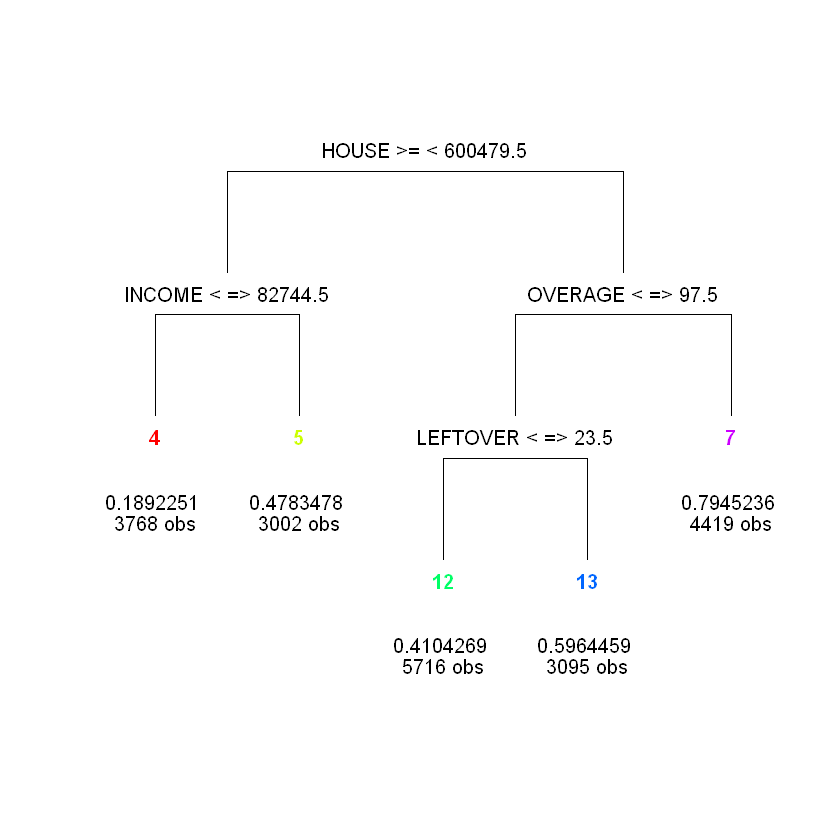

In [195]:
drawTreeNodes(data.dtree_ep2, size=4, nodeinfo = FALSE)

By increasing minbucket it is possible to create a simpler tree with less splits. Looks like this model could suffer from high bias and insufficient capacity for the data.

In [202]:
data.dtree_pp <- rpart(CHURN~.,data=ord_hot_df_merged, control=rpart.control(cp=0))

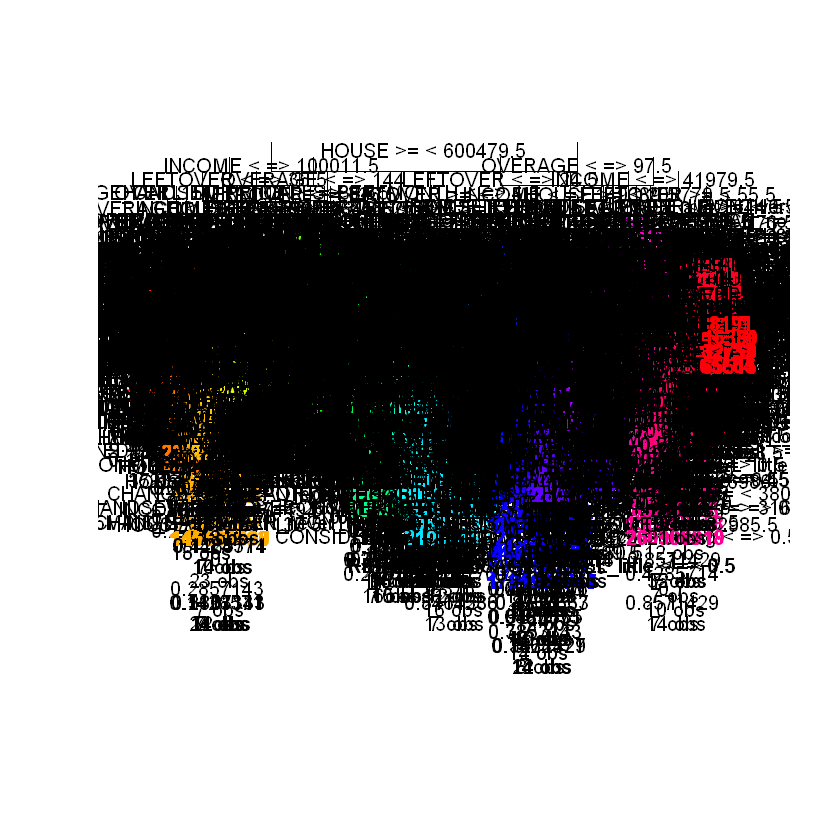

In [203]:
drawTreeNodes(data.dtree_pp, size=4, nodeinfo = FALSE)

With a low minbucket value and cp = 0 the tree just keeps splitting. This is likely to cause overfitting once we use the model to predict unseen data

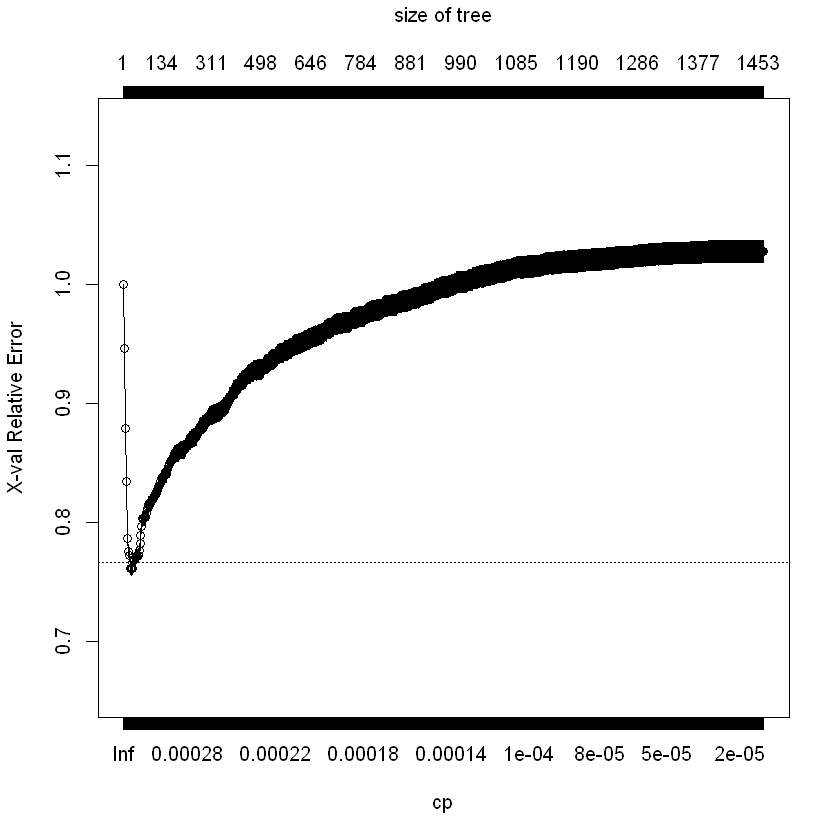

In [204]:
plotcp(data.dtree_pp)

In [205]:
data.dtree_pp <- prune(data.dtree_pp, cp = 0.00020 )

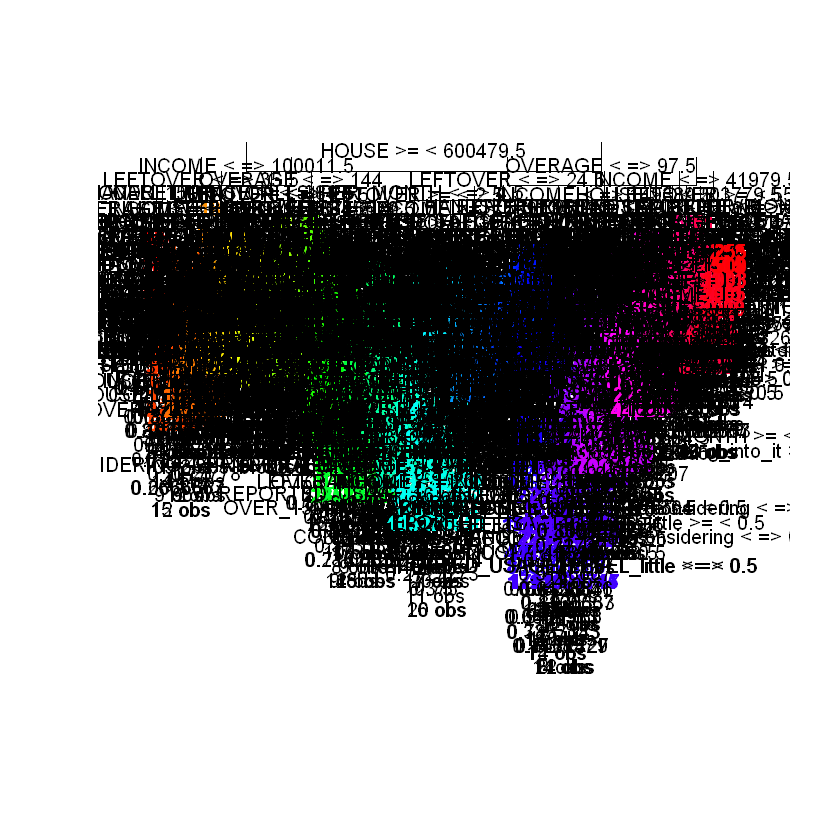

In [206]:
drawTreeNodes(data.dtree_pp, size=4, nodeinfo = FALSE)

With postpruning the tree still looks too complicated. To evaluate which model is best a validation set is required. A 70:30 train:valid split seems appropriate for this data set.

# Repeating the experiment with a 70:30 split 

In [238]:
ind <- c(sample(nrow(ord_hot_df_merged),nrow(ord_hot_df_merged)*0.70))

In [239]:
x_train <- ord_hot_df_merged[ind,]
x_val <- ord_hot_df_merged[-ind,]

In [240]:
valid_data.dtree1 <- rpart(CHURN~.,data=x_train)
valid_data.dtree_ep <- rpart(CHURN~.,data=x_train, control=rpart.control(cp=0.0001, minbucket=100, minsplit=300))
valid_data.dtree_ep2 <- rpart(CHURN~.,data=x_train, control=rpart.control(cp=0, minbucket=3000, minsplit=5000))
valid_data.dtree_pp <- rpart(CHURN~.,data=x_train, control=rpart.control(cp=0))
valid_data.dtree_pp <- prune(valid_data.dtree_pp, cp = 0.00020 )

Now that we have our new trees built with just training data we would like to evaluate the model. Problem is the output belongs to the interval [0,1]. For this reason it is necessary to choose a boundary for the probabilities. Over this boundary we predict 1 and under it 0

### First tree

In [252]:
pred1 = as.numeric(predict(valid_data.dtree1,x_val) >= 0.5)

In [253]:
sum(pred1 == as.numeric(x_val$CHURN))/nrow(x_val)

[1] 0.6855

### Second tree

In [254]:
pred2 = as.numeric(predict(valid_data.dtree_ep,x_val) >= 0.5)

In [255]:
sum(pred2 == as.numeric(x_val$CHURN))/nrow(x_val)

[1] 0.6875

### Third tree

In [256]:
pred3 = as.numeric(predict(valid_data.dtree_ep2,x_val) >= 0.5)

In [257]:
sum(pred3 == as.numeric(x_val$CHURN))/nrow(x_val)

[1] 0.65

### Fourth tree

In [258]:
pred4 = as.numeric(predict(valid_data.dtree_pp,x_val) >= 0.5)

In [259]:
sum(pred4 == as.numeric(x_val$CHURN))/nrow(x_val)

[1] 0.6365

### Comments:
It seems as if all previous models perform badly on the data set. After looking more closely at the trees, I noticed none of the categorical hot-encoded variables were used in building the model.
https://stats.stackexchange.com/questions/171192/why-do-decision-trees-rpart-prefer-to-choose-continuous-over-categorical-variabl
"Classical decision tree algorithms - e.g., CART (as implemented in rpart) or C4.5 - are biased towards variables with many possible splits. The reason is that they use exhaustive search over all possible splits in all possible variables without accounting for finding larger improvements by "chance" when searching over more splits."

In [223]:
library(partykit)

## Trying with a different package

In [260]:
newtree <- ctree(CHURN~., data=x_train)

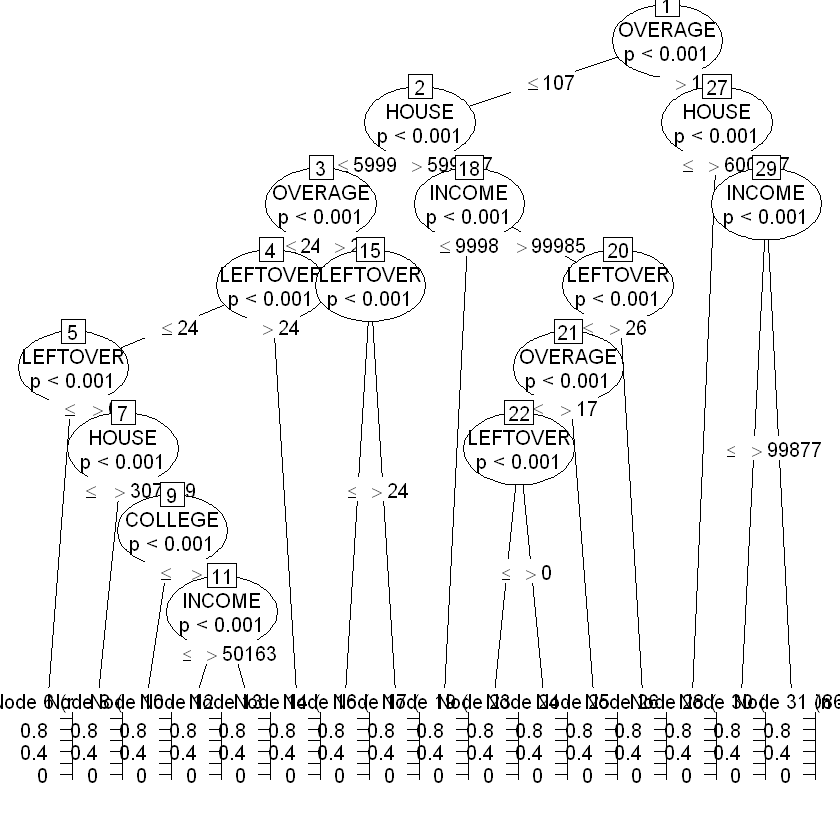

In [264]:
plot(newtree)

In [298]:
predc = as.numeric(predict(newtree,x_val) >= 0.5)

In [299]:
sum(predc == as.numeric(x_val$CHURN))/nrow(x_val)

[1] 0.6883333

We obtained a small boost in performance. It might be possible to obtain an even better accuracy by choosing embedding instead of one-hot encoding for ordinal variables or by adding more trees to build a random forest. 